In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [3]:
car = pd.read_csv("../datasets/cars/New_cars_preprocessed.csv")
car.head()

,Unnamed: 0,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Wheelbase (in),SAE Net Torque @ RPM,Fuel System,...,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Front Wheel Material,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire rim size
0,0,40600.0,22.0,10,2,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
1,1,45500.0,22.0,10,2,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
2,2,43600.0,22.0,10,2,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,15,45.0,20.0
3,3,37400.0,22.0,10,2,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
4,4,42600.0,21.0,10,1,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0


In [4]:
car = car.drop(['Unnamed: 0'], axis=1)
car

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Wheelbase (in),SAE Net Torque @ RPM,Fuel System,SAE Net Horsepower @ RPM,...,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Front Wheel Material,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire rim size
0,40600.0,22.0,10,2,5,4,108.3,280.0,0,272.0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
1,45500.0,22.0,10,2,5,4,108.3,280.0,0,272.0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
2,43600.0,22.0,10,2,5,4,108.3,280.0,0,272.0,...,6.0,39.0,1,50000.0,0,2019,2,15,45.0,20.0
3,37400.0,22.0,10,2,5,4,108.3,280.0,0,272.0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
4,42600.0,21.0,10,1,5,4,108.3,280.0,0,272.0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32257,45700.0,22.0,10,1,5,4,109.2,258.0,0,240.0,...,4.0,37.1,1,150000.0,42,2018,0,12,50.0,18.0
32258,41200.0,20.0,11,1,5,4,109.3,266.0,2,250.0,...,4.0,37.1,1,150000.0,42,2016,0,12,50.0,18.0
32259,44850.0,20.0,11,1,5,4,109.3,266.0,2,250.0,...,4.0,37.1,1,150000.0,42,2016,0,12,50.0,18.0
32260,41000.0,20.0,11,1,5,4,109.3,266.0,2,250.0,...,4.0,37.1,1,150000.0,42,2015,0,12,50.0,18.0


In [5]:
X_car = car.copy()
y_car = X_car.pop("MSRP")
colnames_car = X_car.columns
colnames = X_car.columns

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32262 entries, 0 to 32261
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MSRP                                  32262 non-null  float64
 1   EPA Fuel Economy Est - City (MPG)     32262 non-null  float64
 2   Engine                                32262 non-null  int64  
 3   Drivetrain                            32262 non-null  int64  
 4   Passenger Capacity                    32262 non-null  int64  
 5   Passenger Doors                       32262 non-null  int64  
 6   Wheelbase (in)                        32262 non-null  float64
 7   SAE Net Torque @ RPM                  32262 non-null  float64
 8   Fuel System                           32262 non-null  int64  
 9   SAE Net Horsepower @ RPM              32262 non-null  float64
 10  Displacement                          32262 non-null  float64
 11  Trans Descripti

In [7]:
model = DecisionTreeRegressor()
model.fit(X_car, y_car)

DecisionTreeRegressor()

Feature: 0, Score: 0.00247
Feature: 1, Score: 0.00083
Feature: 2, Score: 0.00242
Feature: 3, Score: 0.00623
Feature: 4, Score: 0.00164
Feature: 5, Score: 0.02139
Feature: 6, Score: 0.02430
Feature: 7, Score: 0.00041
Feature: 8, Score: 0.55218
Feature: 9, Score: 0.03797
Feature: 10, Score: 0.00021
Feature: 11, Score: 0.00288
Feature: 12, Score: 0.00024
Feature: 13, Score: 0.00063
Feature: 14, Score: 0.00062
Feature: 15, Score: 0.00021
Feature: 16, Score: 0.00442
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00151
Feature: 19, Score: 0.26314
Feature: 20, Score: 0.00690
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00148
Feature: 23, Score: 0.00411
Feature: 24, Score: 0.00043
Feature: 25, Score: 0.00690
Feature: 26, Score: 0.00287
Feature: 27, Score: 0.00114
Feature: 28, Score: 0.02980
Feature: 29, Score: 0.00601
Feature: 30, Score: 0.00170
Feature: 31, Score: 0.00414
Feature: 32, Score: 0.00532
Feature: 33, Score: 0.00546


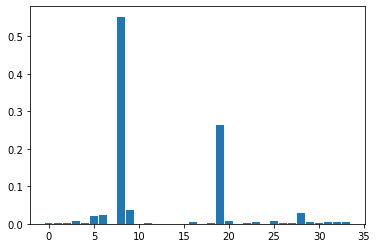

In [8]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [9]:
cart = DecisionTreeRegressor()
cart.fit(X_car,y_car)
ranks["CART"] = ranking(cart.feature_importances_, colnames);
ranks

{'CART': {'EPA Fuel Economy Est - City (MPG)': 0.0,
  'Engine': 0.0,
  'Drivetrain': 0.0,
  'Passenger Capacity': 0.01,
  'Passenger Doors': 0.0,
  'Wheelbase (in)': 0.04,
  'SAE Net Torque @ RPM': 0.03,
  'Fuel System': 0.0,
  'SAE Net Horsepower @ RPM': 1.0,
  'Displacement': 0.08,
  'Trans Description Cont.': 0.0,
  'Trans Type': 0.01,
  'Air Bag-Side Head-Front': 0.0,
  'Air Bag-Side Head-Rear': 0.0,
  'Child Safety Rear Door Locks': 0.0,
  'Daytime Running Lights': 0.0,
  'Traction Control': 0.01,
  'Night Vision': 0.0,
  'Rollover Protection Bars': 0.0,
  'Basic Miles/km': 0.48,
  'Basic Years': 0.01,
  'Corrosion Miles/km': 0.0,
  'Corrosion Years': 0.0,
  'Drivetrain Miles/km': 0.01,
  'Drivetrain Years': 0.0,
  'Turning Diameter - Curb to Curb (ft)': 0.01,
  'Front Wheel Material': 0.01,
  'Roadside Assistance Miles/km': 0.0,
  'Manufacturer': 0.05,
  'Model year': 0.01,
  'Category': 0.0,
  'Front tire width': 0.01,
  'Front tire aspect ratio': 0.01,
  'Front tire rim size': 

In [10]:
decimalrank_df = pd.DataFrame()

# Join preranks in dataframe
for method_name, rank_list in ranks.items():
    df_Temp = pd.DataFrame(data = {method_name:pd.Series(rank_list)})
    decimalrank_df = pd.concat([decimalrank_df,df_Temp ], axis=1)

rank_df = pd.DataFrame()
# Create new integer ranks
for method_name, rank_list in ranks.items():
    rank_df[method_name] = decimalrank_df[method_name].rank(ascending=False)

rank_df['feature_name'] = rank_df.index

In [11]:
ranksout = rank_df.melt(id_vars = 'feature_name', var_name='method', value_name='feature_rank')
ranksout['dataset'] = 'cars'
ranksout

,feature_name,method,feature_rank,dataset
0,EPA Fuel Economy Est - City (MPG),CART,26.0,cars
1,Engine,CART,26.0,cars
2,Drivetrain,CART,26.0,cars
3,Passenger Capacity,CART,12.0,cars
4,Passenger Doors,CART,26.0,cars
5,Wheelbase (in),CART,5.0,cars
6,SAE Net Torque @ RPM,CART,6.0,cars
7,Fuel System,CART,26.0,cars
8,SAE Net Horsepower @ RPM,CART,1.0,cars
9,Displacement,CART,3.0,cars


In [12]:
ranksout.to_csv('../data/CART/cars_featureranks_CART.csv', sep=';',index=False)